In [1]:
comp = 'DNA_damage DNA_replication_inhibitor Folic_Acid_synthesis_inhibitor Membrane_perturbation Protein_synthesis cell_wall_synthesis_inhibitor new_hit'.split(' ')
import pandas as pd

data = []
for i in comp:
    for j in range(1, 3):
        df = pd.read_csv(
            '../data/gsea_output/' + i + '_' + str(j)+'.txt', sep='\t', usecols=['NAME', 'FWER p-val'], index_col=0)
        data.append(df)

In [2]:
import numpy as np

new2 = []
labels2 = []
ones = [1, 3, 5, 7, 9, 11, 13] 
for i in ones:
    curr = np.log10(data[i].iloc[:3, 0])
    curr[curr == np.inf] = 2
    new2 += list(curr)
    
    labels2 += list(data[i].index[:3])

In [3]:
new = []
labels = []
ones = [0, 2, 4, 6, 8, 10, 12] 
for i in ones:
    curr = -np.log10(data[i].iloc[:3, 0])
    curr[curr == np.inf] = 1.5686362358410126
    new += list(curr)
    
    labels += list(data[i].index[:3])
labels = [i.split(',')[0] for i in labels]

/Users/albertwang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
color = ['#1f77b4', '#1f77b4', '#1f77b4',
         '#ff7f0e', '#ff7f0e', '#ff7f0e',
         '#2ca02c', '#2ca02c', '#2ca02c',
         '#d62728', '#d62728', '#d62728',
         '#9467bd', '#9467bd', '#9467bd',
         '#8c564b', '#8c564b', '#8c564b',
         '#7f7f7f', '#7f7f7f', '#7f7f7f']

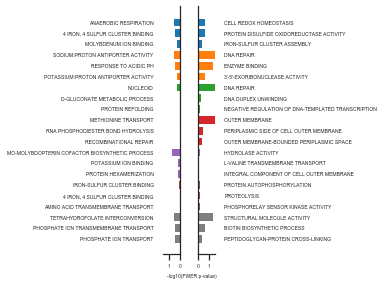

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', rc={'font.sans-serif':'Arial'})

plt.figure(figsize=(5.5, 4))

ax = plt.subplot(122)
plt.barh(range(len(new))[::-1], new, tick_label=labels, color=color)
ax.tick_params(left=False, right=False)
ax.tick_params(labelleft=False, labelright=True)
plt.xlim(0, 1.5686362358410126)
sns.despine()
ax.tick_params(axis='both', which='major', labelsize=5)
ax.tick_params(axis='both', which='minor', labelsize=5)

ax = plt.subplot(121)
plt.barh(range(len(new2))[::-1], new2, tick_label=labels2, color=color)
ax.tick_params(left=False, right=False)
ax.tick_params(labelleft=True, labelright=False)
plt.xlim(-1.5686362358410126, 0)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-1, 0], [1, 0])
ax.tick_params(axis='both', which='major', labelsize=5)
ax.tick_params(axis='both', which='minor', labelsize=5)

fig = plt.gcf()
fig.suptitle('-log10(FWER p-value)', fontsize=5, y=0.03)

plt.tight_layout()
plt.savefig('../figs/gsea1.png', dpi=300)
plt.show()